In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy import log as ln
from termcolor import colored

Método que grafica un diagrama de barras

In [2]:
def bar_plot(x,name):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=data[x].value_counts().index, y=data[x].value_counts(), data=data,edgecolor='black', color='gray')
    ax.set_xlabel(name)
    ax.set_ylabel('frecuencia ni')
    ax.set_title(f'Diagrama de barras {name}')
    plt.show()

Método que grafica una ojiva y el histograma

In [3]:
def hist_Ogive_plot(x,m,name):
    plt.figure(figsize=(20,5))
    ax = plt.subplot(121)
    sns.distplot(data[x], bins=m, kde=False,color='gray')
    ax.set_title(f"Histograma de {name}")
    ax.set_ylabel('Frecuencia Absoluta ni')
    ax.set_xlabel(name)
    ax = plt.subplot(122)
    sns.distplot(data[x], bins=m, kde_kws=dict(cumulative=True), color='gray')
    ax.set_title(f"Diagrama de Ojiva de {name}")
    ax.set_ylabel('Freacuencia Relativa Acumulada Fi')
    ax.set_xlabel(name)

In [4]:
def box_plot_B(name,serie):
    ax = sns.boxplot(x=serie,color='red')
    ax.set_title(f'Diagrama de cajas de {name}')
    ax.set_xlabel(name)

Grafica un digrama de caja

In [5]:
def box_plot(x,name):
    ax = sns.boxplot(x=data[x], color='gray')
    ax.set_title(f'Diagrama de cajas de {name}')
    ax.set_xlabel(name)

Determina el número de intervalos que debe tener la tabla de frecuencias

In [6]:
def intervals_class(N):
    m1 = np.sqrt(N)
    m2 = 1+3.3*np.log10(N)
    m3 = ln(N)/ln(2)
    return [m1,m2,m3] 

Método que crea los intervalos que debe tener la tabla de frecuencias

In [7]:
def made_intervals_class(x, m,date,t):
    range_i =  date[x].max() - date[x].min()
    amplitude = range_i/m
    tupla = (range_i,np.rint(amplitude)) 
    if t == 1:
        tupla = (range_i,np.round(amplitude,5))
    return tupla

Método que crea la marca de clase

In [8]:
def class_mark(intervale,c):
    f_value = np.round((intervale[0][1]+intervale[0][0])/2,5)
    m_values = []
    m_values.append(f_value)
    for i in range(len(intervale)-1):
        f_value = np.round(f_value + c,5)
        m_values.append(f_value)
    return m_values

Crea tabla de frecuencia para datos cuantitativos

In [50]:
def made_frequency_table_A(x, date,t,name):
    
    m = int(np.rint(np.array(intervals_class(date[x].shape[0])).min()))
    temp = made_intervals_class(x, m,date,t)
    r = temp[0]
    c = temp[1]
    intervale = []
    n = data[x].min()
    for i in range(m):
        if i < m-1:
            intervale.append((n,np.around(n+c,5)))
            n = np.around(n+c,5)
        else:
            intervale.append((n,np.around(n+c,5)+(data[x].max()-(np.around(n+c,5)))))
    
    alfa = date[x]
    alfa = alfa.sort_values()
    
    ni = []
    for i in range(m):
        if i==0:
            a = alfa[alfa <= intervale[i][1]]
            ni.append(len(a))
        else:
            a = alfa[(alfa > intervale[i][0]) & (alfa<=intervale[i][1])]
            ni.append(len(a))
    dic = {name:intervale,'ni':ni}
    dic = pd.DataFrame(dic)
    total = dic['ni'].sum()
    dic['fi'] = dic['ni']/total
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic['Xí'] = class_mark(intervale,c)
    dic.loc[str(m)] = ['Total',total,' ',' ',' ',' ']
    return dic    

Crea tabla de frecuencia para datos categoricos

In [56]:
def made_frequency_table_B(x,date,m):
    
    intervale = []
    ni = []
    intervale = list(date[x].unique())
    ni = list(date[x].value_counts(dropna = False).values)
    dic = pd.DataFrame()
    total = np.sum(ni)
    dic[m] = intervale
    dic['ni'] = ni
    dic['fi'] = np.round(dic['ni']/total,5)
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic.loc[len(ni)+1] = ['Total',total,' ',' ',' ']
    return dic

# Preparación de los datos
#### Descripción de las caracteristicas ('features')
- ts:     Hora de inicio del flujo
- te:     Hora de finalización del flujo
- td:     Duración del flujo
- sa:     Dirección IP origen
- da:     Dirección IP de destino
- sp:     Puerto de origen
- dp:     Puerto de destino
- pr:     Protocolo
- flg:    Banderas
- fwd:    Estado de reenvío
- stos:   Tipo de servicio de origen
- ipkt:   Paquetes de entrada
- ibyt:   Bytes de entrada
- opkt:   Paquetes de salida
- obyt:   Bytes de salida
- in:     Interfaz de entrada
- out:    Interfaz de salida
- sas:    Número de sistema autónomo BGP de origen
- das:    Número de sistema autónomo BGP de destino
- smk:    Máscara de red de origen
- dmk:    Máscara de red de destino
- dtos:   Tipo de servicio de destino
- dir:    Dirección del flujo
- nh:     Enrutador de siguiente salto
- nhb:    Enrutador de siguiente salto BGP
- svln:   VLAN de origen
- dvln:   VLAN de destino
- ismc:   Dirección MAC de la fuente de entrada   
- odmc:   Dirección MAC de destino de salida
- idmc:   Introduzca la dirección MAC de destino
- osmc:   Dirección MAC de la fuente de salida
- mpls1:  Etiqueta MPLS 1
- mpls2:  Etiqueta MPLS 2
- mpls3:  Etiqueta MPLS 3
- mpls4:  Etiqueta MPLS 4
- mpls5:  Etiqueta MPLS 5
- mpls6:  Etiqueta MPLS 6
- mpls7:  Etiqueta MPLS 7
- mpls8:  Etiqueta MPLS 8
- mpls9:  Etiqueta MPLS 9
- mpls10: Etiqueta MPLS 10
- cl:     Latencia del cliente
- sl:     Latencia del servidor
- al:     Latencia de la aplicación
- ra:     Exportando la dirección IP del sistema (enrutador)
- eng:    Tipo / ID de motor
- exid:   Exportando el ID del sistema
- tr:     Marca de tiempo de flujo recibido
- type:   Tipo de registro Mina/ no Mina 
- cryptocurrency: : Tipo criptomoneda
- id_Cryptocurrency:: Id Criptomoneda

In [11]:
print(colored(f'Cargamos los datos', attrs=['bold']))
data = pd.read_csv('./dataA.csv')
data.head(100)

Cargamos los datos


,index,References,ts,te,td,sa,da,sp,dp,pr,...,mpls10,cl,sl,al,ra,eng,exid,tr,cryptocurrency,type
0,99020,319-csves/1.csv,2020-09-12 15:29:52,2020-09-12 15:29:52,0.000,192.168.0.1,192.168.0.13,53.0,52947.0,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
1,122925,387-csves/0.csv,2020-09-12 22:58:30,2020-09-12 22:58:30,0.580,192.168.0.12,239.255.255.250,41213.0,1900.0,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
2,261357,764-csves/1.csv,2020-09-16 22:25:21,2020-09-16 22:25:21,0.000,192.168.0.13,192.168.0.1,52109.0,53.0,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
3,26581,101-csves/1.csv,2020-09-10 04:01:12,2020-09-10 04:02:44,92.252,172.217.30.206,192.168.0.13,443.0,40096.0,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
4,32874,130-csves/0.csv,2020-09-10 06:48:02,2020-09-10 06:48:02,0.000,104.18.226.52,192.168.0.13,443.0,51808.0,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
5,431941,1232-csves/1.csv,2020-09-20 23:01:11,2020-09-20 23:01:11,0.000,192.168.0.13,192.168.0.1,46605.0,53.0,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
6,238827,689-csves/1.csv,2020-09-16 14:48:57,2020-09-16 14:49:44,46.830,172.217.173.34,192.168.0.13,443.0,40088.0,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
7,72416,251-csves/1.csv,2020-09-10 23:18:54,2020-09-10 23:19:51,56.703,150.136.25.38,192.168.0.13,443.0,52608.0,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
8,397579,1141-csves/1.csv,2020-09-20 14:16:52,2020-09-20 14:18:24,92.128,192.168.0.13,104.36.115.109,51496.0,443.0,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
9,72286,251-csves/1.csv,2020-09-10 23:18:13,2020-09-10 23:19:45,92.089,192.168.0.13,67.202.110.21,44742.0,443.0,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine


# Análisis inicial

In [12]:
print(colored(f'Observamos el número de registros en total, cuantos valores hay por columnas, así como sus valores nulos y el tipo de dato de cada columna', attrs=['bold']))
data.info()

Observamos el número de registros en total, cuantos valores hay por columnas, así como sus valores nulos y el tipo de dato de cada columna
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465084 entries, 0 to 465083
Data columns (total 52 columns):
index             465084 non-null int64
References        465084 non-null object
ts                465084 non-null object
te                464976 non-null object
td                464976 non-null float64
sa                464976 non-null object
da                464976 non-null object
sp                464976 non-null float64
dp                464976 non-null float64
pr                464976 non-null object
flg               464976 non-null object
fwd               464976 non-null float64
stos              464976 non-null float64
ipkt              464976 non-null float64
ibyt              464976 non-null float64
opkt              464976 non-null float64
obyt              464976 non-null float64
in                464976 non-null float64
out

In [13]:
print(colored(f'El conjunto de datos consta de {len(data.index)} registros y {len(data.columns)} columnas', attrs=['bold']))

El conjunto de datos consta de 465084 registros y 52 columnas


### Inspección datos faltantes

In [14]:
print(colored(f'Valores faltantes por columnas', attrs=['bold']))
avaliable = data.notnull()
avaliable.apply(pd.Series.value_counts).T

Valores faltantes por columnas


,False,True
index,NaN,465084.0
References,NaN,465084.0
ts,NaN,465084.0
te,108.0,464976.0
td,108.0,464976.0
sa,108.0,464976.0
da,108.0,464976.0
sp,108.0,464976.0
dp,108.0,464976.0
pr,108.0,464976.0


In [15]:
print(colored(f'Valores faltantes en todo el conjunto de datos', attrs=['bold']))
avaliable = avaliable.all(axis=1).value_counts()
avaliable

Valores faltantes en todo el conjunto de datos


True     464976
False       108
dtype: int64

In [16]:
print(colored(f'Eliminamos los datos faltantes, ya que tan solo representan un {(avaliable[0]/avaliable[1])*100}% de los datos. Quedaron {data.shape[0] - avaliable[0]} registros', attrs=['bold']))

Eliminamos los datos faltantes, ya que tan solo representan un 0.02322700526478786% de los datos. Quedaron 464976 registros


In [17]:
data = data.dropna()

### Inspección de tipo de dato incorrecto
Analice que las columnas tuvieran un tipo de dato acorde a su naturaleza. Me concentrare en datos que tengan por lo menos dos valores en los registros, puesto que hay varias categorías con un solo valor.

<font color="Red"><b><h2> Análisis</h2> </font>
Las variables: puerto de origen (sp), puerto de destino (dp), paquetes de entrada(ipkt) y número de bytes de entrada (ibyte), son de naturaleza discreta y no continuas. Por el motivo anterior le cambio el tipo de dato a un discreto.

In [18]:
data = data.astype({'sp':'int64'})
data = data.astype({'dp':'int64'})
data = data.astype({'ipkt':'int64'})
data = data.astype({'ibyt':'int64'})

### Estructuración del conjunto de datos
Agrupo las columnas de tipo discretas(int64), continuas(float64) y categóricas(object) por separado, para hacer una análisis más organizado

In [19]:
data_numeric_int = (data.dtypes == "int64")
data_numeric_float = (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric_int = [c for c in data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

Variables cuantitativas discretas

In [20]:
data_numeric_int

['index', 'sp', 'dp', 'ipkt', 'ibyt']

Variables cuantitativas continuas

In [21]:
print(data_numeric_float)

['td', 'fwd', 'stos', 'opkt', 'obyt', 'in', 'out', 'sas', 'das', 'smk', 'dmk', 'dtos', 'dir', 'svln', 'dvln', 'cl', 'sl', 'al', 'exid']


Variables categoricas

In [22]:
print(data_object)

['References', 'ts', 'te', 'sa', 'da', 'pr', 'flg', 'nh', 'nhb', 'ismc', 'odmc', 'idmc', 'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4', 'mpls5', 'mpls6', 'mpls7', 'mpls8', 'mpls9', 'mpls10', 'ra', 'eng', 'tr', 'cryptocurrency', 'type']


### Balance del conjunto de datos
Analizare si la data esta balanceada

Text(0, 0.5, 'Cantidad de observaciones')

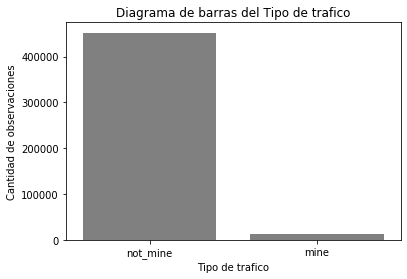

In [23]:
ax = sns.countplot(x='type', data=data, color='gray')
ax.set_title("Diagrama de barras del Tipo de trafico")
ax.set_xlabel('Tipo de trafico')
ax.set_ylabel('Cantidad de observaciones')

<font color="Red"><b><h2> Análisis</h2> </font>
El conjunto de datos A como se aprecia no esta balanceada, esto es debido a que en un principio se trato de balancear el conjunto de datos B que tiene trafico minero no identificado, por tal razón el conjunto benigno se le añadió más registros. **Para remediar lo anterior, agrupare de manera pseudoaletoria registros no mineros con la finalidad de balancear el conjunto de datos A**.

In [24]:
data_M = data[data['type'] == 'mine']
data_NM = data[data['type'] == 'not_mine']
dataNM_i = list(data_NM.index)
random.shuffle(dataNM_i)
ind_G = dataNM_i[0:data_M.shape[0]]

In [25]:
print(colored(f'Concatenamos', attrs=['bold']))
data_agrupada = data_NM[data_NM.index.isin(ind_G)]
data = pd.concat([data_agrupada,data_M], axis=0)
print(colored(f'Genero un rango de valores', attrs=['bold']))
indices = list(data.index)
print(colored(f'El rango de valores se le aplico aleatoriedad de manera pseudoaleatoria', attrs=['bold']))
random.shuffle(indices)
print(colored(f'Reacomodo los registros del conjunto con los indices aleatorios', attrs=['bold']))
data = data.reindex(indices)
data.head()

Concatenamos
Genero un rango de valores
El rango de valores se le aplico aleatoriedad de manera pseudoaleatoria
Reacomodo los registros del conjunto con los indices aleatorios


,index,References,ts,te,td,sa,da,sp,dp,pr,...,mpls10,cl,sl,al,ra,eng,exid,tr,cryptocurrency,type
347279,317804,922-csves/1.csv,2020-09-18 12:28:53,2020-09-18 12:28:54,0.458,fe80::a881:f8e:e69b:a337,ff02::1:3,56446,5355,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
234024,86713,292-csves/0.csv,2020-09-11 20:52:47,2020-09-11 20:54:24,96.892,192.168.0.13,199.232.50.49,50058,443,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
209843,8375,71-csves/3.csv,2019-04-07 18:38:51,2019-04-07 18:39:31,39.964,192.168.1.99,172.65.207.106,58780,4444,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Etherium,mine
158583,283359,823-csves/1.csv,2020-09-17 15:11:32,2020-09-17 15:11:32,0.000,192.168.0.13,76.13.32.147,58738,443,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
451739,418914,1198-csves/0.csv,2020-09-20 19:42:59,2020-09-20 19:46:13,194.237,192.168.0.13,172.217.28.110,36652,443,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine


Text(0, 0.5, 'Cantidad de observaciones')

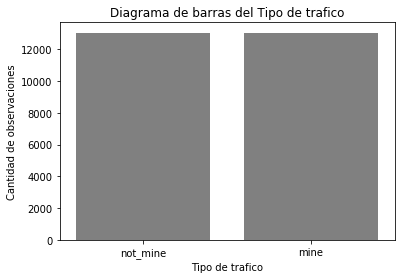

In [26]:
ax = sns.countplot(x='type', data=data, color='gray')
ax.set_title("Diagrama de barras del Tipo de trafico")
ax.set_xlabel('Tipo de trafico')
ax.set_ylabel('Cantidad de observaciones')

# Inspección de datos no agrupados

### Datos categoricos 

No tengo en cuenta a 'references', ya que solo hace referencia a los nombres de los flujos. La moda(top) indica que hay elementos con la misma referencia, dado que concatenamos varios registros de diferentes conjuntos de datos, pero no significa que los registros sean repetidos.

In [27]:
print(colored(f'Variables categoricas', attrs=['bold']))
data[data_object].describe().T

Variables categoricas


,count,unique,top,freq
References,26064,3101,1033-csves/1.csv,84
ts,26064,18175,2020-09-19 22:59:17,9
te,26064,19475,2020-09-20 16:39:54,7
sa,26064,1916,192.168.0.13,6254
da,26064,1894,192.168.0.13,6391
pr,26064,4,TCP,22673
flg,26064,19,...AP...,11698
nh,26064,1,0.0.0.0,26064
nhb,26064,1,0.0.0.0,26064
ismc,26064,1,00:00:00:00:00:00,26064


<font color="Red"><b><h2> Análisis</h2> </font>
- Las Hora de inicio (ts) y la hora final(te) tienen la misma moda, con la misma frecuencia.
- La dirección ip de origen (sa) y la dirección ip de origen (da) tienen la misma moda. Con frecuencias distintas
- La moda en el protocolo es TCP.
- La flag con mas iteraciones es __A__.
- Tanto el enrutador de salto y de salto BGP tienen la misma intrfaz para todos sus registros.
- La dirección Mac (idmc) de entrada y la dirección mac(odmc) no fueron registradas por la herramienta

### Datos continuos

In [28]:
print(colored(f'Variables continuas', attrs=['bold']))
data[data_numeric_float].describe().T

Variables continuas


,count,mean,std,min,25%,50%,75%,max
td,26064.0,77.318031,131.687469,0.0,0.07875,19.9625,82.42975,599.533
fwd,26064.0,0.000000,0.000000,0.0,0.00000,0.0000,0.00000,0.000
stos,26064.0,0.000000,0.000000,0.0,0.00000,0.0000,0.00000,0.000
opkt,26064.0,0.000000,0.000000,0.0,0.00000,0.0000,0.00000,0.000
obyt,26064.0,0.000000,0.000000,0.0,0.00000,0.0000,0.00000,0.000
in,26064.0,0.000000,0.000000,0.0,0.00000,0.0000,0.00000,0.000
out,26064.0,0.000000,0.000000,0.0,0.00000,0.0000,0.00000,0.000
sas,26064.0,0.000000,0.000000,0.0,0.00000,0.0000,0.00000,0.000
das,26064.0,0.000000,0.000000,0.0,0.00000,0.0000,0.00000,0.000
smk,26064.0,0.000000,0.000000,0.0,0.00000,0.0000,0.00000,0.000


<font color="Red"><b><h2> Análisis</h2> </font>

- La variable de tiempo es la unica variable, cuyo valor es distinto a 0
- La mayoria de los datos se encuentran entre el cuartil 2 y el cuartil 3

### Datos discretos

In [29]:
print(colored(f'Variables continuas', attrs=['bold']))
data[data_numeric_int].describe().T

Variables continuas


,count,mean,std,min,25%,50%,75%,max
index,26064.0,115159.006753,144135.747291,0.0,3522.75,9856.5,225415.50,451960.0
sp,26064.0,26951.423189,25568.446334,0.0,443.00,14444.0,55582.00,65531.0
dp,26064.0,26748.653890,25512.629159,53.0,1900.00,5353.0,55582.00,64790.0
ipkt,26064.0,31.136664,396.637427,1.0,2.00,7.0,20.00,58001.0
ibyt,26064.0,15462.627225,574409.223938,8.0,80.00,548.0,3082.25,85759643.0


<font color="Red"><b><h2> Análisis</h2> </font>

- No tomo encuenta la columna index, puesto que solo hace referencia a los indices
- Puerto de origen (sp) tiene la mayoria de datos distribuidos en el segundo y tercer cuartil
- Puerto de destino (dp) tiene la mayoria de los datos en el primer y tercer cuartil, mayoritariamente en el tercero
- El flujo de paquetes parece tener la mayoria de datos por encima del tercer cuartil
- Flujo de bytes tambien parece tener la mayoria de datos por encima del tercer cuartil

# Datos atipicos

In [103]:
data_numeric_int_list = ['sp', 'dp', 'ipkt', 'ibyt']
name = ['Puerto origen', 'Puerto destino','Paquetes de entrada','Bytes de entrada']

### Variables discretas

Hay 0 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 0.0% datos atipicos


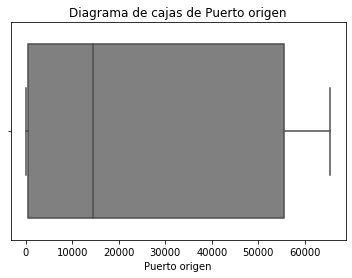

In [108]:
m = data_numeric_int_list[0]
box_plot(m,name[0])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100 
print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

Hay 0 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 0.0% datos atipicos


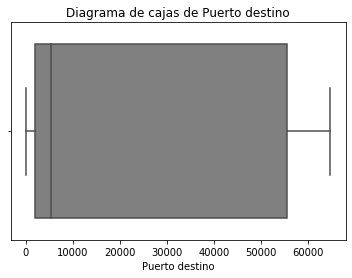

In [109]:
m = data_numeric_int_list[1]
box_plot(m,name[1])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100 
print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

Hay 2363 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 9.066144874155924% datos atipicos


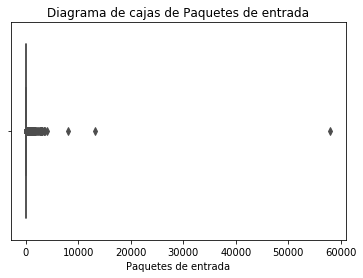

In [110]:
m = data_numeric_int_list[2]
box_plot(m,name[2])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100 
print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

Hay 3521 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 13.509054634745244% datos atipicos


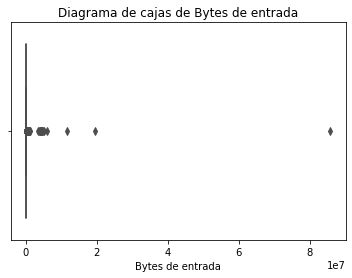

In [111]:
m = data_numeric_int_list[3]
box_plot(m,name[3])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100 
print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

In [98]:
data_numeric_float_list = ['td']
name = ['Duración del flujo']

### Variable continua

Hay 3569 valores atipicos en el limite superior
Hay 0 valores atipicos en el limite inferior
Hay 13.693216697360345% datos atipicos


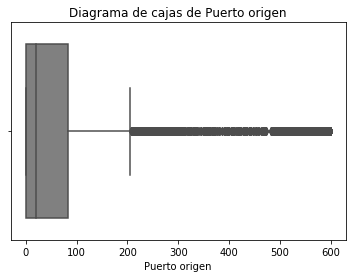

In [112]:
m = data_numeric_float_list[0]
box_plot(m,name[0])
q1 = data[m].quantile(0.25)
q3 = data[m].quantile(0.75)
ric = q3-q1
borde_s = q3 + 1.5*ric
borde_i = q1-1.5*ric
atip_s = data[data[m]>borde_s].shape[0]
atip_i = data[data[m]<borde_i].shape[0]
porc = ((atip_s+atip_i)/data[m].shape[0]) * 100 
print(colored(f'Hay {atip_s} valores atipicos en el limite superior', attrs=['bold']))
print(colored(f'Hay {atip_i} valores atipicos en el limite inferior', attrs=['bold']))
print(colored(f'Hay {porc}% datos atipicos', attrs=['bold']))

# Análisis datos Agrupados

### Datos categoricos

- No tengo en cuenta a las variables 'nh', 'nhb', 'ismc', 'odmc', 'idmc', 'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4', 'mpls5', 'mpls6', 'mpls7', 'mpls8', 'mpls9', 'mpls10', 'ra', 'eng' y 'tr' en esta etapa del análisis, puesto que solamente hay un valor y es el mismo para todos los registros.

In [53]:
data_object_list = ['pr','flg', 'cryptocurrency', 'type']
tables_frequency_cualitative = []
namess = ['Protocolo','Banderas','Criptomonedas','Tipo']
for j, i in enumerate(data_object_list):
    tables_frequency_cualitative.append(made_frequency_table_B(i, data,namess[j]))

Tabla de frecuencia Protocolo


,Protocolo,ni,fi,Ni,Fi
0,UDP,22673,0.8699,22673,0.8699
1,TCP,3379,0.12964,26052,0.99954
2,ICMP6,6,0.00023,26058,0.99977
3,ICMP,6,0.00023,26064,1
5,Total,26064,,,


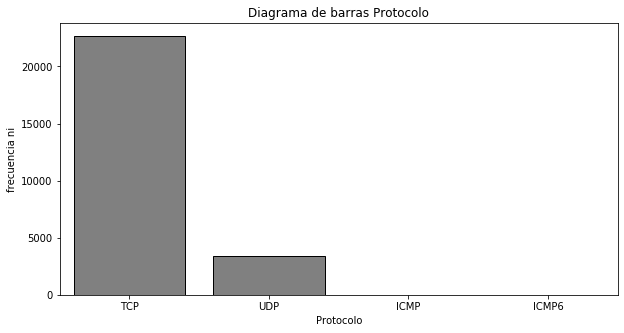

TCP      22673
UDP       3379
ICMP         6
ICMP6        6
Name: pr, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el TCP con 22673 registros.


In [113]:
print(colored(f'Tabla de frecuencia {namess[0]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[0])
display(table_f)
bar_plot(data_object_list[0],namess[0])
v = data[data_object_list[0]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Banderas


,Banderas,ni,fi,Ni,Fi
0,........,11698,0.44882,11698,0.44882
1,...AP.S.,4778,0.18332,16476,0.63214
2,...AP...,3391,0.1301,19867,0.76224
3,...A....,1588,0.06093,21455,0.82317
4,...A...F,1559,0.05981,23014,0.88298
5,...AP.SF,1092,0.0419,24106,0.92488
6,...APRS.,870,0.03338,24976,0.95826
7,...AP..F,270,0.01036,25246,0.96862
8,...APRSF,246,0.00944,25492,0.97806
9,......S.,203,0.00779,25695,0.98585


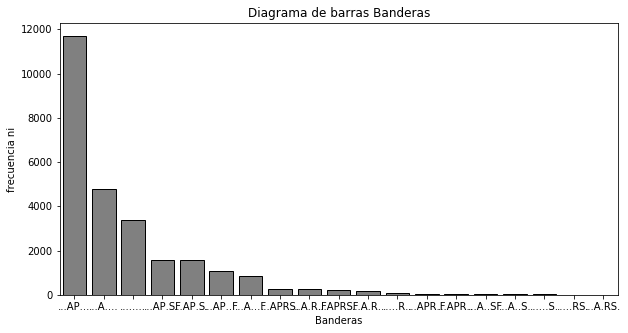

...AP...    11698
...A....     4778
........     3391
...AP.SF     1588
...AP.S.     1559
...AP..F     1092
...A...F      870
...APRS.      270
...A.R.F      246
...APRSF      203
...A.R..      162
.....R..       85
...APR.F       43
...APR..       21
...A..SF       19
...A..S.       15
......S.       15
.....RS.        8
...A.RS.        1
Name: flg, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el ...AP... con 11698 registros.


In [114]:
print(colored(f'Tabla de frecuencia {namess[1]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[1])
display(table_f)
bar_plot(data_object_list[1],namess[1])
v = data[data_object_list[1]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Criptomonedas


,Criptomonedas,ni,fi,Ni,Fi
0,Does_not_have,13032,0.5,13032,0.5
1,Etherium,10145,0.38923,23177,0.88923
2,Bitcoin,987,0.03787,24164,0.9271
3,Monero,761,0.0292,24925,0.9563
4,Litecoin,745,0.02858,25670,0.98488
5,Bitcash,394,0.01512,26064,1
7,Total,26064,,,


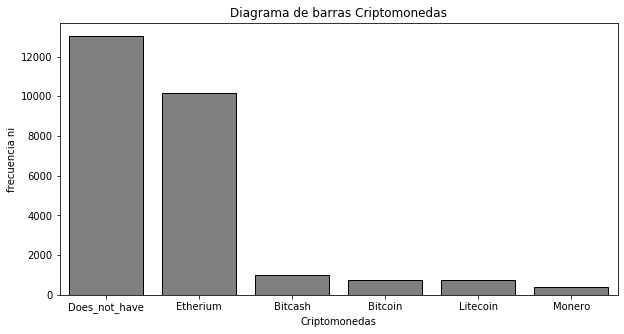

Does_not_have    13032
Etherium         10145
Bitcash            987
Bitcoin            761
Litecoin           745
Monero             394
Name: cryptocurrency, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el Does_not_have con 13032 registros.


In [115]:
print(colored(f'Tabla de frecuencia {namess[2]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[2])
display(table_f)
bar_plot(data_object_list[2],namess[2])
v = data[data_object_list[2]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Tipo


,Tipo,ni,fi,Ni,Fi
0,not_mine,13032,0.5,13032,0.5
1,mine,13032,0.5,26064,1
3,Total,26064,,,


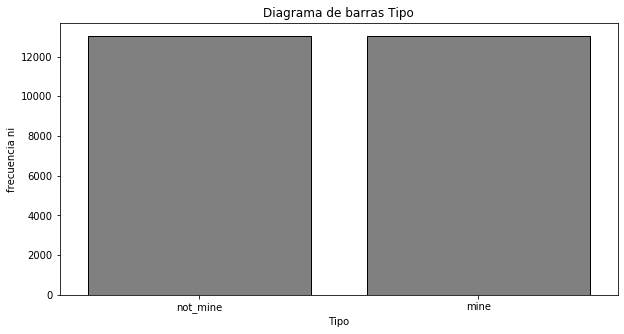

not_mine    13032
mine        13032
Name: type, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el not_mine con 13032 registros.


In [116]:
print(colored(f'Tabla de frecuencia {namess[3]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[3])
display(table_f)
bar_plot(data_object_list[3],namess[3])
v = data[data_object_list[3]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

### Datos continuos

Las variables 'fwd', 'stos', 'opkt', 'obyt', 'in', 'out', 'sas', 'das', 'smk', 'dmk', 'dtos', 'dir', 'svln', 'dvln', 'cl', 'sl','al' y 'exid' son descartadas para esta etapa del analisis exploratorio, puesto que su valor es 0 en sus registros.

In [67]:
data_numeric_float_list = ['td']
name = ['Duración del flujo']
tables_frequency_fl = []
for j, i in enumerate(data_numeric_float_list):
    tables_frequency_fl.append(made_frequency_table_A(i, data,1, name[j]))

In [42]:
m = intervals_class(data.shape[0])
m = int(np.rint(np.min(m)))
m

15

Tabla de frecuencia de Duración del flujo


,Duración del flujo,ni,fi,Ni,Fi,Xí
0,"(0.0, 39.96887)",15440,0.592388,15440,0.592388,19.9844
1,"(39.96887, 79.93774)",4026,0.154466,19466,0.746854,59.9533
2,"(79.93774, 119.90661)",1578,0.0605433,21044,0.807397,99.9222
3,"(119.90661, 159.87548)",880,0.033763,21924,0.84116,139.891
4,"(159.87548, 199.84435)",546,0.0209484,22470,0.862109,179.86
5,"(199.84435, 239.81322)",294,0.0112799,22764,0.873389,219.829
6,"(239.81322, 279.78209)",1360,0.0521793,24124,0.925568,259.798
7,"(279.78209, 319.75096)",554,0.0212554,24678,0.946823,299.767
8,"(319.75096, 359.71983)",83,0.00318447,24761,0.950008,339.735
9,"(359.71983, 399.6887)",64,0.00245549,24825,0.952463,379.704


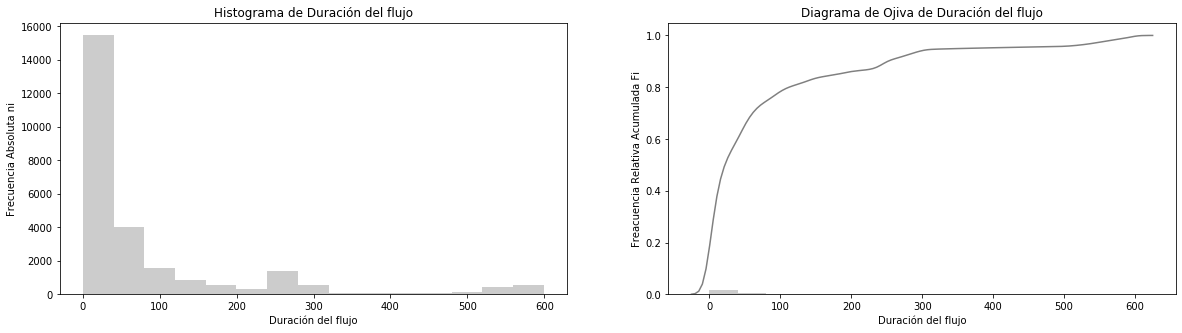

In [70]:
print(colored(f'Tabla de frecuencia de {name[0]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[0])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[0],m,name[0])

### Datos discretos

In [44]:
data_numeric_int_list = ['sp', 'dp', 'ipkt', 'ibyt']        
tables_frequency_int = []
name = ['Puerto origen', 'Puerto destino','Paquetes de entrada','Bytes de entrada']
for j,i in enumerate(data_numeric_int_list):
    tables_frequency_int.append(made_frequency_table_A(i, data,1,name[j]))

Tabla de frecuencia de Puerto origen
                 Puerto origen     ni           fi     Ni        Fi       Xí
0              (0, 4368.73333)   7881     0.302371   7881  0.302371  2184.37
1     (4368.73333, 8737.46666)   5119     0.196401  13000  0.498772   6553.1
2    (8737.46666, 13106.19999)      4  0.000153468  13004  0.498926  10921.8
3   (13106.19999, 17474.93332)    197   0.00755832  13201  0.506484  15290.6
4   (17474.93332, 21843.66665)      1  3.83671e-05  13202  0.506522  19659.3
5   (21843.66665, 26212.39998)      0            0  13202  0.506522    24028
6   (26212.39998, 30581.13331)      0            0  13202  0.506522  28396.8
7   (30581.13331, 34949.86664)    561    0.0215239  13763  0.528046  32765.5
8   (34949.86664, 39318.59997)    970    0.0372161  14733  0.565262  37134.2
9    (39318.59997, 43687.3333)    915    0.0351059  15648  0.600368    41503
10   (43687.3333, 48056.06663)    984    0.0377532  16632  0.638122  45871.7
11  (48056.06663, 52424.79996)   1747  

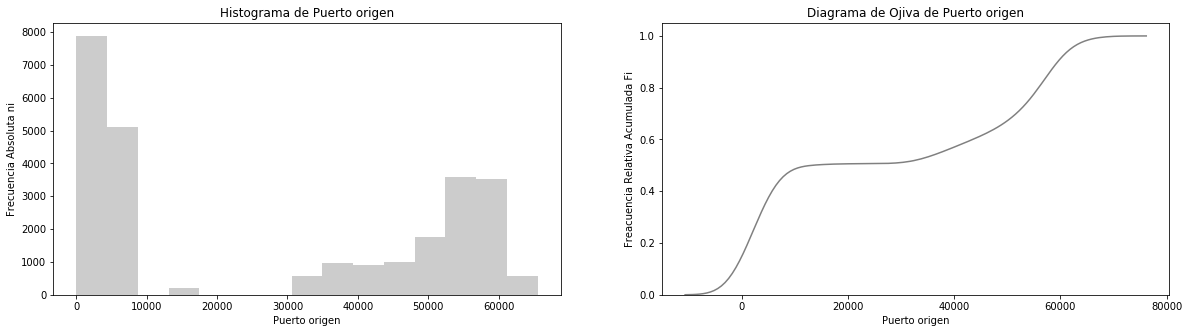

In [45]:
print(colored(f'Tabla de frecuencia de {name[0]}',attrs=['bold']))
print(tables_frequency_int[0])
hist_Ogive_plot(data_numeric_int_list[0],m,name[0])

Tabla de frecuencia de Puerto destino
        Puerto destino     ni           fi     Ni        Fi       Xí
0         (53, 4368.8)   7908     0.303407   7908  0.303407   2210.9
1     (4368.8, 8684.6)   5210     0.199893  13118    0.5033   6526.7
2    (8684.6, 13000.4)      2  7.67342e-05  13120  0.503376  10842.5
3   (13000.4, 17316.2)    197   0.00755832  13317  0.510935  15158.3
4   (17316.2, 21632.0)      1  3.83671e-05  13318  0.510973  19474.1
5   (21632.0, 25947.8)      0            0  13318  0.510973  23789.9
6   (25947.8, 30263.6)      0            0  13318  0.510973  28105.7
7   (30263.6, 34579.4)    370    0.0141958  13688  0.525169  32421.5
8   (34579.4, 38895.2)    984    0.0377532  14672  0.562922  36737.3
9   (38895.2, 43211.0)    998    0.0382904  15670  0.601212  41053.1
10  (43211.0, 47526.8)    974    0.0373696  16644  0.638582  45368.9
11  (47526.8, 51842.6)   1540    0.0590853  18184  0.697667  49684.7
12  (51842.6, 56158.4)   2034    0.0780387  20218  0.775706  5400

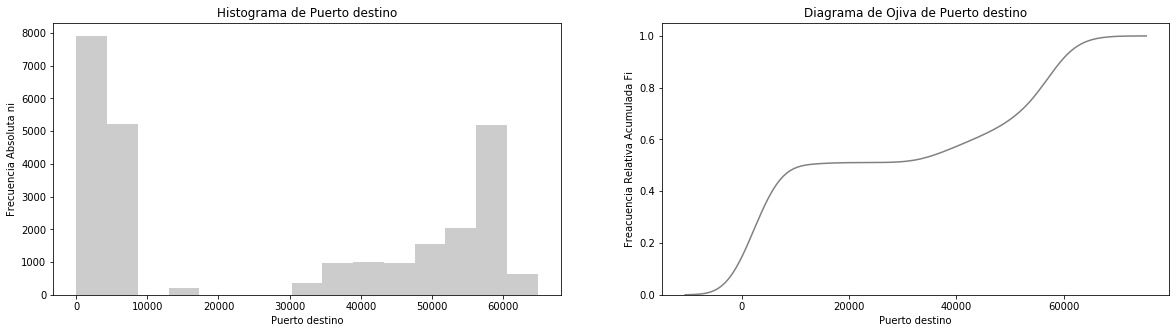

In [46]:
print(colored(f'Tabla de frecuencia de {name[1]}',attrs=['bold']))
print(tables_frequency_int[1])
hist_Ogive_plot(data_numeric_int_list[1],m,name[1])

Tabla de frecuencia de Paquetes de entrada
           Paquetes de entrada     ni           fi     Ni        Fi       Xí
0              (1, 3867.66667)  26060     0.999847  26060  0.999847  1934.33
1     (3867.66667, 7734.33334)      1  3.83671e-05  26061  0.999885     5801
2    (7734.33334, 11601.00001)      1  3.83671e-05  26062  0.999923  9667.67
3   (11601.00001, 15467.66668)      1  3.83671e-05  26063  0.999962  13534.3
4   (15467.66668, 19334.33335)      0            0  26063  0.999962    17401
5   (19334.33335, 23201.00002)      0            0  26063  0.999962  21267.7
6   (23201.00002, 27067.66669)      0            0  26063  0.999962  25134.3
7   (27067.66669, 30934.33336)      0            0  26063  0.999962    29001
8   (30934.33336, 34801.00003)      0            0  26063  0.999962  32867.7
9    (34801.00003, 38667.6667)      0            0  26063  0.999962  36734.3
10   (38667.6667, 42534.33337)      0            0  26063  0.999962    40601
11  (42534.33337, 46401.00004)   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:180: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  args=endog)[0] for i in range(1, gridsize)]


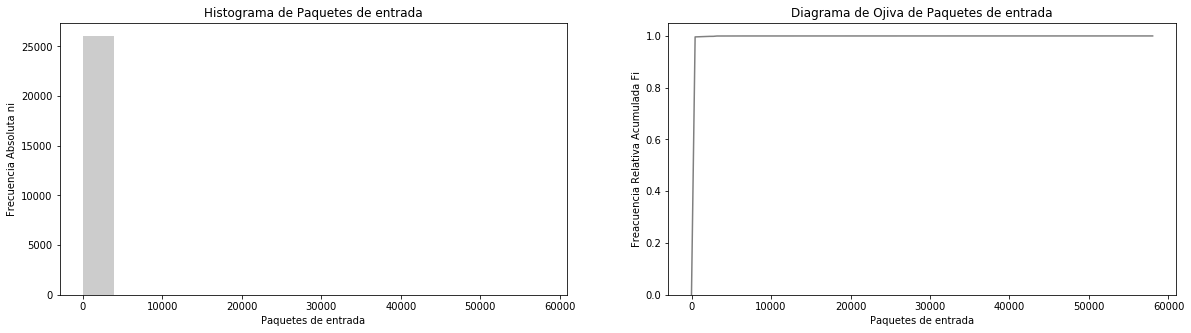

In [47]:
print(colored(f'Tabla de frecuencia de {name[2]}',attrs=['bold']))
print(tables_frequency_int[2])
hist_Ogive_plot(data_numeric_int_list[2],m,name[2])

Tabla de frecuencia de Bytes de entrada
            Bytes de entrada     ni           fi     Ni        Fi           Xí
0             (8, 5717317.0)  26060     0.999847  26060  0.999847  2.85866e+06
1    (5717317.0, 11434626.0)      1  3.83671e-05  26061  0.999885  8.57597e+06
2   (11434626.0, 17151935.0)      1  3.83671e-05  26062  0.999923  1.42933e+07
3   (17151935.0, 22869244.0)      1  3.83671e-05  26063  0.999962  2.00106e+07
4   (22869244.0, 28586553.0)      0            0  26063  0.999962  2.57279e+07
5   (28586553.0, 34303862.0)      0            0  26063  0.999962  3.14452e+07
6   (34303862.0, 40021171.0)      0            0  26063  0.999962  3.71625e+07
7   (40021171.0, 45738480.0)      0            0  26063  0.999962  4.28798e+07
8   (45738480.0, 51455789.0)      0            0  26063  0.999962  4.85971e+07
9   (51455789.0, 57173098.0)      0            0  26063  0.999962  5.43144e+07
10  (57173098.0, 62890407.0)      0            0  26063  0.999962  6.00318e+07
11  (6289040

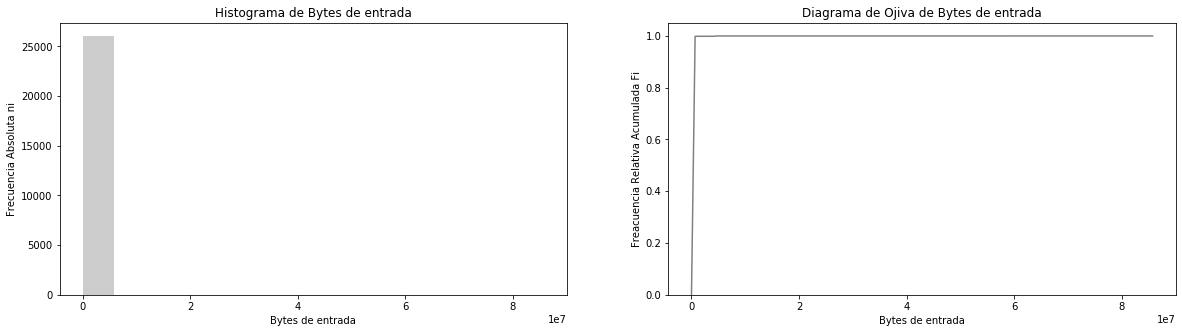

In [48]:
print(colored(f'Tabla de frecuencia de {name[3]}',attrs=['bold']))
print(tables_frequency_int[3])
hist_Ogive_plot(data_numeric_int_list[3],m,name[3])

In [ ]:
resumen = 

In [72]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,26064,NaN,NaN,NaN,115159,144136,0,3522.75,9856.5,225416,451960
References,26064,3101,1033-csves/1.csv,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ts,26064,18175,2020-09-19 22:59:17,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
te,26064,19475,2020-09-20 16:39:54,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
td,26064,NaN,NaN,NaN,77.318,131.687,0,0.07875,19.9625,82.4297,599.533
sa,26064,1916,192.168.0.13,6254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
da,26064,1894,192.168.0.13,6391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp,26064,NaN,NaN,NaN,26951.4,25568.4,0,443,14444,55582,65531
dp,26064,NaN,NaN,NaN,26748.7,25512.6,53,1900,5353,55582,64790
pr,26064,4,TCP,22673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
